In [1]:
# load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# mount drive to google colab
from google.colab import drive
drive.mount('/content/drive')

# mount specific file path to notebook
%cd /content/drive/Othercomputers/My_laptop/KPMG_virual_internship/Task_one

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Othercomputers/My_laptop/KPMG_virual_internship/Task_one


In [3]:
# load in demographic data and print few lines
customer_demographic_data = pd.read_excel("/content/drive/Othercomputers/My_laptop/KPMG_virual_internship/Task_one/KPMG_VI_New_raw_data_update_final.xlsx"
                                  ,'CustomerDemographic', skiprows = [0])
# make a copy
customer_demographic_copy = customer_demographic_data.copy()

customer_demographic_data.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0


In [4]:
# get number of rows and columns
customer_demographic_data.shape

(4000, 13)

In [5]:
# get number of unique customers
customer_demographic_data['customer_id'].nunique()

4000

### Data Quality Issues to Check
*   Data types of each varaible
*   Check for duplicated values
*   Check for outliers in the numerical data
*   Check for inconsistent labels

In [6]:
# get information about data types and missing values
customer_demographic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

* Some variables have inconsistent data types and needs to be changed. Some variables also have missing values, I will be dropping them because it may affect further analysis.

In [7]:
# drop missing values
customer_demographic_data = customer_demographic_data.dropna()

# get shape of new dataset
customer_demographic_data.shape

(2630, 13)

In [8]:
# convert column for customer id and date of birth
customer_demographic_data['customer_id'] = customer_demographic_data['customer_id'].astype(str)
customer_demographic_data['DOB'] = customer_demographic_data['DOB'].astype('datetime64[ns]')

# check if it has been changed
customer_demographic_data[['DOB', 'customer_id']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2630 entries, 0 to 3996
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DOB          2630 non-null   datetime64[ns]
 1   customer_id  2630 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 61.6+ KB


In [9]:
# extract year of birth from the date of birth and use it getting the customer's age
customer_demographic_data['year_of_birth'] = customer_demographic_data['DOB'].dt.year

# It assumed that the data was collected at year 2017, therefore it is used in calculating the year
customer_demographic_data['cutomer_age'] = 2017 - customer_demographic_data['year_of_birth']

In [10]:
# check for duplicate entries
customer_demographic_data.duplicated().sum()

0

* There are no duplicates in the data

In [11]:
# get numerical summary for the numeric columns
numerical_columns = customer_demographic_data[['past_3_years_bike_related_purchases', 'tenure', 'cutomer_age']]
numerical_columns.describe()

,past_3_years_bike_related_purchases,tenure,cutomer_age
count,2630.000000,2630.000000,2630.000000
mean,49.363498,10.671483,39.758935
std,28.841657,5.676862,12.494794
min,0.000000,1.000000,15.000000
25%,25.000000,6.000000,30.000000
50%,48.500000,10.000000,40.000000
75%,74.000000,16.000000,49.000000
max,99.000000,22.000000,86.000000


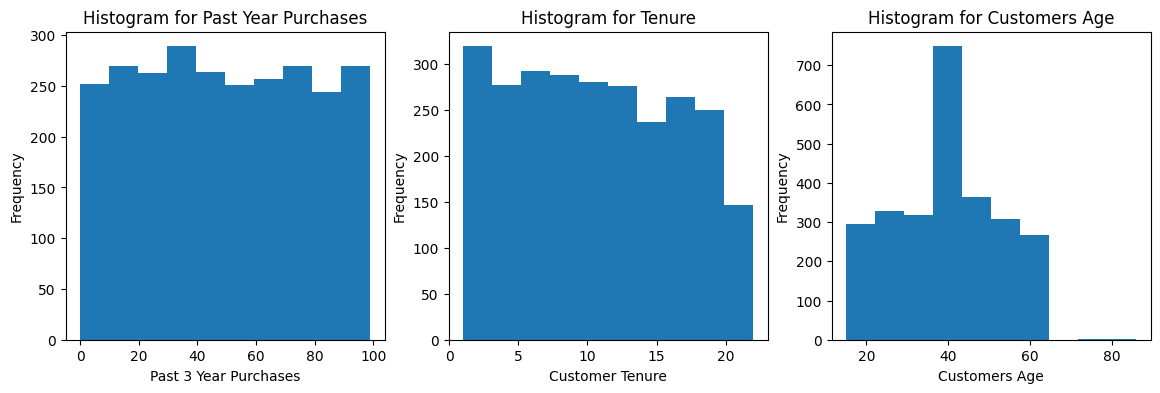

In [12]:
# plot histigrams to view the distribution better

# set figure size
plt.figure(figsize= (14, 4))

# first subplot
plt.subplot(1, 3, 1)
plt.hist(customer_demographic_data['past_3_years_bike_related_purchases'])
plt.title('Histogram for Past Year Purchases')
plt.xlabel('Past 3 Year Purchases')
plt.ylabel('Frequency')

# second subplot
plt.subplot(1, 3, 2)
plt.hist(customer_demographic_data['tenure'])
plt.title('Histogram for Tenure')
plt.xlabel('Customer Tenure')
plt.ylabel('Frequency')


# third subplot
plt.subplot(1, 3, 3)
plt.hist(customer_demographic_data['cutomer_age'])
plt.title('Histogram for Customers Age')
plt.xlabel('Customers Age')
plt.ylabel('Frequency')

plt.show()

In [13]:
# check for inconsistent labels
categorical_columns = customer_demographic_data[['gender', 'job_industry_category', 'wealth_segment', 'owns_car']]

for col in categorical_columns:
    print(f'Value counts for {col}:')
    print(customer_demographic_data[col].value_counts())
    print()

Value counts for gender:
gender
Female    1366
Male      1262
F            1
Femal        1
Name: count, dtype: int64

Value counts for job_industry_category:
job_industry_category
Manufacturing         635
Financial Services    626
Health                496
Retail                278
Property              222
IT                    119
Entertainment         110
Argiculture            91
Telecommunications     53
Name: count, dtype: int64

Value counts for wealth_segment:
wealth_segment
Mass Customer        1300
High Net Worth        674
Affluent Customer     656
Name: count, dtype: int64

Value counts for owns_car:
owns_car
Yes    1361
No     1269
Name: count, dtype: int64



* There is inconsistent labeling for the gender column.

In [14]:
# replace some labels so it can be consistent
customer_demographic_data['gender'] = customer_demographic_data['gender'].replace({'F': 'Female', 'Femal': 'Female', 'M' : 'Male',
                                                                                  'U' :'Unisex'})
# check the labels
customer_demographic_data['gender'].value_counts()

gender
Female    1368
Male      1262
Name: count, dtype: int64

In [15]:
# drop the default column as it does not provide any meaningful information on the customers
customer_demographic_data.drop('default', axis = 1, inplace = True)

In [16]:
# saved cleaned data to csv
customer_demographic_data.to_csv('customer_demographic_cleaned_data.csv', index = False)